# **Kendall Lab Survival Curve**

## **11-1-24**

### **Brian J. Ault**

In [1]:
!pip install lifelines

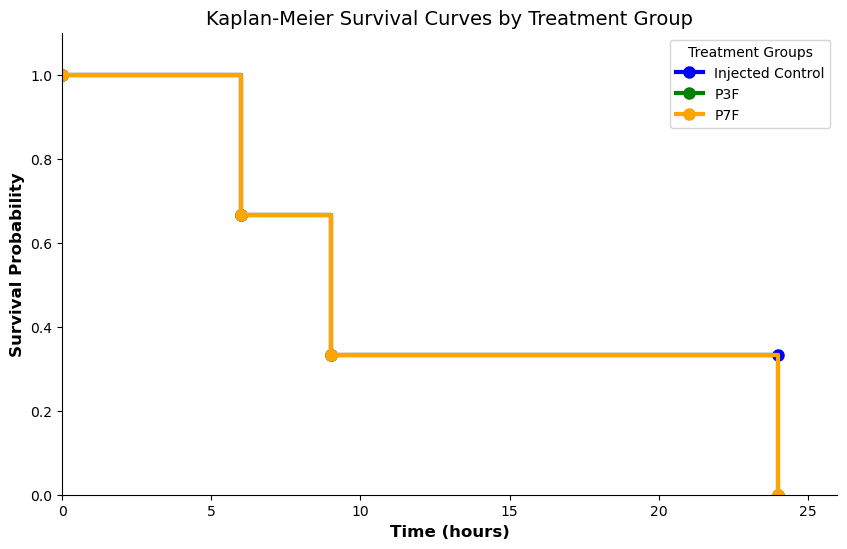

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

# Correct Data Preparation with sample sizes and deaths
survival_data = {
    'time': [
        6, 9, 24,  # Injected Control
        6, 9, 24,  # P3F
        6, 9, 24   # P7F
    ],
    'event_observed': [
        1, 4, 0,  # Injected Control (1 death at 6h, 4 at 9h, 0 at 24h)
        1, 6, 11,  # P3F (1 death at 6h, 6 at 9h, 11 at 24h)
        1, 5, 8   # P7F (1 death at 6h, 5 at 9h, 8 at 24h)
    ],
    'n_at_risk': [
        40, 39, 35,  # Injected Control
        44, 43, 37,  # P3F
        43, 42, 37   # P7F
    ],
    'group': [
        'Injected Control', 'Injected Control', 'Injected Control',  # Injected Control
        'P3F', 'P3F', 'P3F',  # P3F
        'P7F', 'P7F', 'P7F'   # P7F
    ]
}

# Prepare DataFrame
df = pd.DataFrame(survival_data)

# Create a Kaplan-Meier plot
plt.figure(figsize=(10, 6))

# Initialize KaplanMeierFitter
kmf = KaplanMeierFitter()

# Define colors for each group
colors = {
    'Injected Control': 'blue',
    'P3F': 'green',
    'P7F': 'orange'
}

# Fit and plot for each group
for group in df['group'].unique():
    group_data = df[df['group'] == group]
    
    # Fit the Kaplan-Meier model
    kmf.fit(durations=group_data['time'], event_observed=group_data['event_observed'], label=group)
    
    # Plot the survival function
    kmf.plot_survival_function(linewidth=3, ci_show=False, marker='o', markersize=8, color=colors[group])

# Customize plot
plt.xlabel('Time (hours)', fontsize=12, fontweight='bold')
plt.ylabel('Survival Probability', fontsize=12, fontweight='bold')
plt.xlim(0, 26)  # Extend x-axis for visibility
plt.ylim(0, 1.1)  # Extend y-axis slightly beyond 1 for clarity

# Customize plot appearance
plt.grid(False)  # Remove grid lines
plt.gca().spines['top'].set_visible(False)  # Remove top border
plt.gca().spines['right'].set_visible(False)  # Remove right border

plt.legend(title='Treatment Groups')
plt.title('Kaplan-Meier Survival Curves by Treatment Group', fontsize=14)
plt.show()